In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4,4]
import warnings
warnings.filterwarnings ('ignore')

# Reading the dataset and displaying first 5 rows

In [4]:
df = pd.read_csv('Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# deleting the unnamed features since its redundant

In [6]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

# Understanding the dataset

# shape and dimensions of the dataset

In [7]:
print(f'no.of rows in the Dataset is {df.shape[0]} and No of columns are {df.shape[1]}\n')

print('Dimension of the data is {}'.format(df.ndim))

no.of rows in the Dataset is 200 and No of columns are 4

Dimension of the data is 2


In [8]:
df.info()

# There are no missing values and all the data types are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Descriptive summary

In [9]:
df.describe()

# We can see what are the average expenditure for each platforms
# we can see that the mean and median value(50% - second quantile) for all the platform is almost nearby

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Null_values

In [10]:
null_values = pd.DataFrame({'null_value_count': df.isnull().sum(),
                            'null_value_percentage': ((df.isnull().sum())/len(df)*100)})
null_values

,null_value_count,null_value_percentage
TV,0,0.0
Radio,0,0.0
Newspaper,0,0.0
Sales,0,0.0


# To see the distribution of the data and Data Points

The Skewness of TV is -0.06985336213274573
The STD of TV is 85.8542363149081
Average expenditure on TV is 147.0425


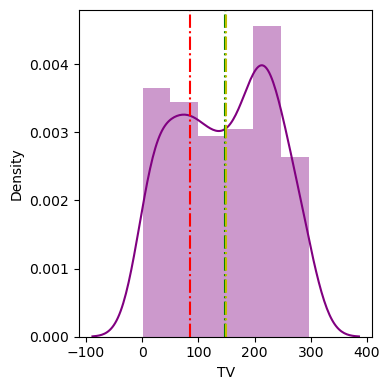

The Skewness of Radio is 0.09417463149664404
The STD of Radio is 14.846809176168723
Average expenditure on Radio is 23.264000000000024


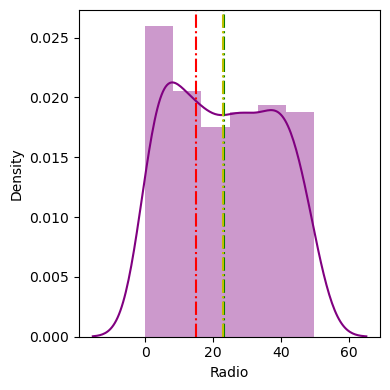

The Skewness of Newspaper is 0.8947204074986175
The STD of Newspaper is 21.778620838522833
Average expenditure on Newspaper is 30.553999999999995


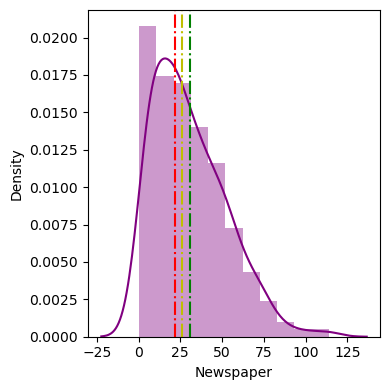

The Skewness of Sales is 0.4075714250767127
The STD of Sales is 5.217456565710477
Average expenditure on Sales is 14.022500000000003


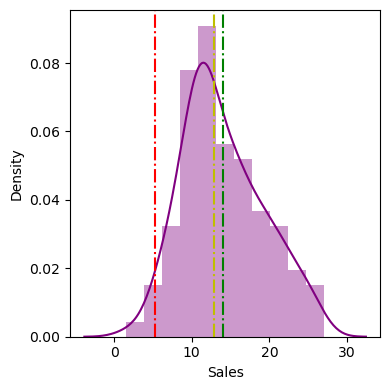

In [11]:
p=1
for i in df.columns:
    print(f'The Skewness of {i} is {df[i].skew()}')
    print(f'The STD of {i} is {df[i].std()}')
    print(f'Average expenditure on {i} is {df[i].mean()}')
    sns.distplot(df[i], color = 'purple')
    plt.axvline(df[i].mean(), color = 'g', linestyle = '-.')
    plt.axvline(df[i].std(), color = 'r', linestyle = '-.')
    plt.axvline(df[i].median(), color = 'y', linestyle = '-.')
    plt.tight_layout()
    plt.show()
    
# Not much skewed in any features

# Outlier Dedection

Outlier Count for TV is : 1


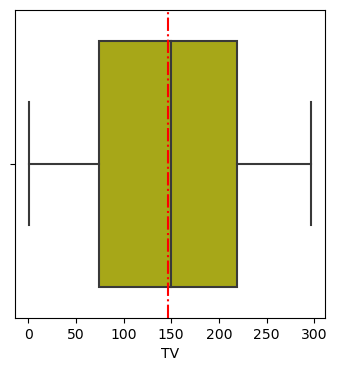

Outlier Count for Radio is : 0


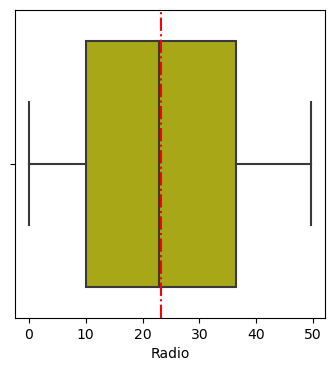

Outlier Count for Newspaper is : 0


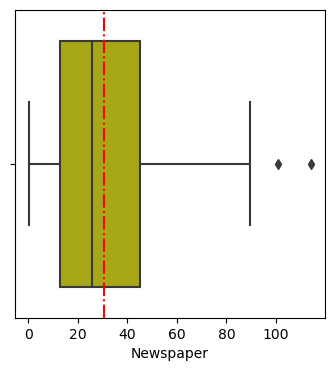

Outlier Count for Sales is : 12


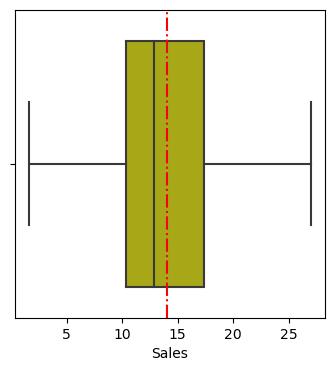

In [12]:
outlier_count={}
for i in df.columns:
    outlier= df[(df[i]<df[i].quantile(0.25)-1.5*(df[i].quantile(0.75)-df[i].quantile(0.25))) |
               (df[i]<df[i].quantile(0.75)-1.5*(df[i].quantile(0.75)-df[i].quantile(0.25)))]
    outlier_count[i]=len(outlier)
    
    
    
for i in df.columns:
    print(f'Outlier Count for {i} is : {outlier_count[i]}')
    sns.boxplot(df[i], color = 'y')
    plt.axvline(df[i].mean(),color= 'r',linestyle = '-.')
    plt.show()

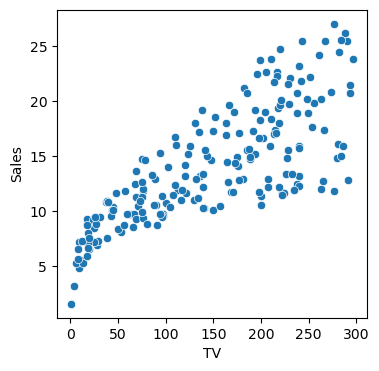

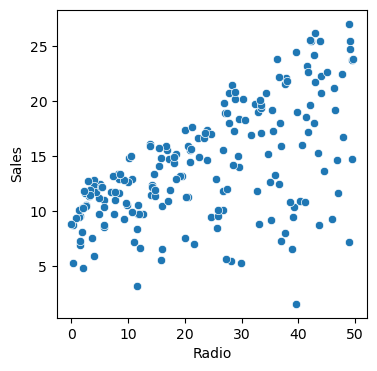

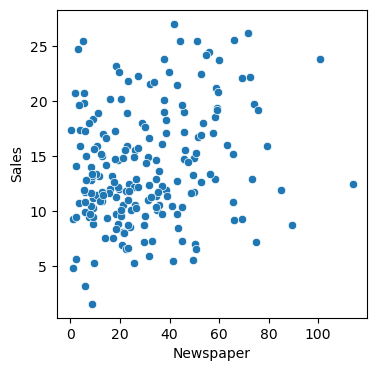

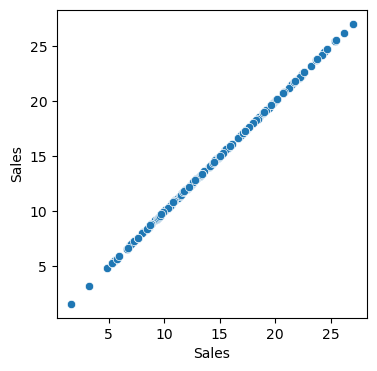

In [13]:
for i in df.columns:
    sns.scatterplot(y=df['Sales'], x = df[i])
    plt.show()
    
    
# We can see the linearty and pattern on TV and Radio

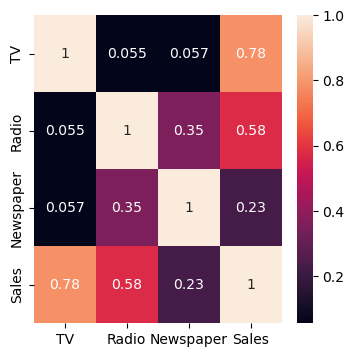

In [14]:
sns.heatmap(df.corr(), annot = True)
plt.show()

<AxesSubplot:>

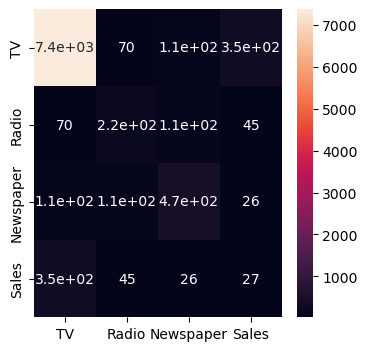

In [15]:
sns.heatmap(df.cov(),annot = True)

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [18]:
x = df.drop('Sales',axis = 1)
y = df['Sales']

In [19]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=42)

In [22]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(160, 3)
(40, 3)
(160,)
(40,)


# Base Model

In [23]:
import statsmodels.api as sma

In [24]:
base_model = sma.OLS(ytrain,sma.add_constant(xtrain)).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.53e-76
Time:                        16:59:23   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9791      0.354      8.427      0.000       2.281       3.677
TV             0.0447      0.002     28.544      0.000       0.042       0.048
Radio          0.1892      0.010     19.518      0.000       0.170       0.208
Newspaper      0.0028      0.007      0.392      0.696      -0.011       0.017
==============================================================================
Omnibus:                       67.697   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.326
Skew:                          -1.627   Prob(JB):                     6.52e-53
Kurtosis:                       8.046   Cond. No.                         471.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Regression Model using sklearn method

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)

y_pred = lr_model.predict(xtest)

In [26]:
# Checking models performance

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.174097353976106
R-squared: 0.8994380241009119


In [27]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(xtrain, ytrain)

y_pred = model_dt.predict(xtest)

mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.175
R-squared: 0.9310914968293178


In [28]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(xtrain, ytrain)

y_pred = model_rf.predict(xtest)

mse = mean_squared_error(ytest,y_pred)
r2 = r2_score(ytest,y_pred)

print(f'Mean squared error: {mse}')
print(f'R_squared: {r2}')


Mean squared error: 0.5907322499999988
R_squared: 0.9812843792541843


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(xtrain,ytrain)

y_pred = model_gbr.predict(xtest)


mse = mean_squared_error(ytest,y_pred)
r2 = r2_score(ytest,y_pred)

print(f'Mean squared error: {mse}')
print(f'R_squared: {r2}')


Mean squared error: 0.5325817328183275
R_squared: 0.9831267080346855


In [30]:
import random

# Step 1: Take random 5 rows from the dataset with columns TV, Radio, Newspaper
random.seed(42)  # Setting a seed for reproducibility
sample_data = df[['TV', 'Radio', 'Newspaper']].sample(5)

In [31]:
# sample_data['Total_Advertising_Spending'] = sample_data['TV'] + sample_data['Radio'] + sample_data['Newspaper']

In [32]:
sample_data

,TV,Radio,Newspaper
175,276.9,48.9,41.8
41,177.0,33.4,38.7
37,74.7,49.4,45.7
9,199.8,2.6,21.2
39,228.0,37.7,32.0


In [33]:
linear_predictions = lr_model.predict(sample_data)
tree_predictions = model_dt.predict(sample_data)
forest_predictions = model_rf.predict(sample_data)
gb_predictions = model_gbr.predict(sample_data)


In [34]:
sample_data['Original Value'] = df.loc[sample_data.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions})

In [35]:
predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction
175,27.0,24.731723,27.0,26.381,26.850089
41,17.1,17.322162,17.1,17.588,17.502245
37,14.7,15.792781,14.7,14.391,14.604479
9,10.6,12.466468,11.6,11.519,11.374566
39,21.5,20.398407,21.5,21.554,21.654661
